In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '00787'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.5461115837097168
{'Retrieve': {'next': 'Initialize', 'nearest_plan': '1. Import the statcast_batter and playerid_lookup functions from pybaseball:\n\n```python\nfrom pybaseball import statcast_batter, playerid_lookup \n```\n\n2. Look up Derek Jeter\'s MLBAM player ID:\n\n```python\njeter_id = playerid_lookup(\'jeter\', \'derek\')  \njeter_mlbam_id = jeter_id[\'key_mlbam\'][0]\n```\n\n3. Get Derek Jeter\'s statcast batting data for the 2008 season:\n\n```python \njeter_2008_data = statcast_batter(\'2008-01-01\', \'2008-12-31\', player_id=jeter_mlbam_id)\n```\n\n4. Filter to only pitches that resulted in home runs and count them:\n\n```python\njeter_2008_hr = jeter_2008_data[jeter_2008_data[\'events\'] == \'home_run\'] \nhr_count = len(jeter_2008_hr)\nprint(f"Derek Jeter hit {hr_count} home runs in the 2008 season.")\n```', 'nearest_task': 'How many home runs did Derek Jeter hit in 2008?', 'nearest_code': '# 1. Impor

In [6]:
task = '''label the x-axis with "game date" and the y-axis with "total k's"'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', name='User'), AIMessage(content='1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup \n```\n\n2. Look up Danny Duffy\'s MLBAM player ID:\n\n```python\nduffy_id = playerid_lookup(\'duffy\', \'danny\')  \nduffy_mlbam_id = duffy_id[\'key_mlbam\'][0]\n```\n\n3. Get Danny Duffy\'s statcast pitching data for the 2018 season:\n\n```python \nduffy_2018_data = statcast_pitcher(\'2018-03-29\', \'2018-10-01\', player_id=duffy_mlbam_id)\n```\n\n4. Filter to only pitches that resulted in strikeouts, group by game date, and calculate the cumulative strikeout sum:\n\n```python\nduffy_2018_strikeouts = duffy_2018_data[duffy_2018_data[\'events\'] == \'strikeout\'] \nduffy_2018_strikeouts_by_date = duffy_2018_strikeouts.groupby(\'game_date\'

{'Orchestrate': {'next': 'Execute'}}
----
Executing: # Import the statcast_pitcher and playerid_lookup functions from pybaseball
from pybaseball import statcast_pitcher, playerid_lookup
Executing: # Look up Danny Duffy's MLBAM player ID 
duffy_id = playerid_lookup('duffy', 'danny')
duffy_mlbam_id = duffy_id['key_mlbam'][0]
print(f"Danny Duffy's MLBAM player ID is {duffy_mlbam_id}")
Result: Gathering player lookup table. This may take a moment.
Danny Duffy's MLBAM player ID is 518633

Executing: # Get Danny Duffy's statcast pitching data for the 2018 season
duffy_2018_data = statcast_pitcher('2018-03-29', '2018-10-01', player_id=duffy_mlbam_id)
Result: Gathering Player Data

Executing: # Filter to only pitches that resulted in strikeouts, group by game date, and calculate the cumulative strikeout sum
duffy_2018_strikeouts = duffy_2018_data[duffy_2018_data['events'] == 'strikeout']
duffy_2018_strikeouts_by_date = duffy_2018_strikeouts.groupby('game_date').size() 
duffy_2018_cum_strikeout

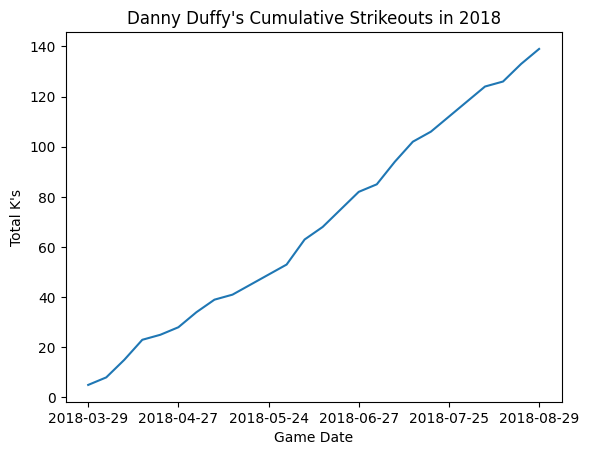

Result: The plot shows Danny Duffy's cumulative strikeout total over the course of the 2018 season. Each data point represents a game he pitched in, with the y-axis value being his total strikeouts in the season up to that game. The plot has an increasing trend, with occasional flat sections representing games where he did not record a strikeout.

{'Execute': {'messages': [AIMessage(content='To plot Danny Duffy\'s cumulative strikeout sum for the 2018 season:\n\n1. I imported the statcast_pitcher and playerid_lookup functions from pybaseball. \n\n2. I looked up Danny Duffy\'s MLBAM player ID using playerid_lookup(\'duffy\', \'danny\'). \n\n3. I retrieved Duffy\'s 2018 Statcast pitching data using statcast_pitcher with his player ID and the 2018 season start/end dates.\n\n4. I filtered the data to only pitches resulting in strikeouts, grouped by game date, and calculated the cumulative strikeout sum.\n\n5. Finally, I plotted the cumulative strikeout sum over the course of the 2018 seaso

In [7]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
